<font size="+3"><strong> Location or Size: What Influences House Prices in Mexico?</strong></font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Import Data

**Task 1.4.1:** Read the CSV file that you created in the last notebook (`"data/mexico-real-estate-clean.csv"`) into a DataFrame named `df`. Be sure to check that all your columns are the correct data type before you go to the next task.


In [2]:
df=pd.read_csv("data/mexico-real-estate-clean.csv")

In [3]:
df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


# Research Question 1

**Which state has the most expensive real estate market?**

Do housing prices vary by state? If so, which are the most expensive states for purchasing a home? During our exploratory data analysis, we used descriptive statistics like mean and median to get an idea of the "typical" house price in Mexico. Now, we need to break that calculation down by state and visualize the results. 

We know in which state each house is located thanks to the `"state"` column. The next step is to divide our dataset into groups (one per state) and calculate the mean house price for each group. 

**Task 1.4.2:** Use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to create a Series named `mean_price_by_state`, where the index contains each state in the dataset and the values correspond to the mean house price for that state. Make sure your Series is sorted from highest to lowest mean price. 


In [4]:
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False).round(2)
mean_price_by_state

state
Querétaro                          133955.91
Guanajuato                         133277.97
Nuevo León                         129221.99
Distrito Federal                   128347.27
Quintana Roo                       128065.42
Chihuahua                          127073.85
Jalisco                            123386.47
Estado de México                   122723.49
Campeche                           121734.63
Puebla                             121732.97
Guerrero                           119854.28
Sonora                             114547.88
Morelos                            112697.30
Aguascalientes                     110543.89
Baja California Sur                109069.34
Yucatán                            108580.39
Chiapas                            104342.31
Veracruz de Ignacio de la Llave     96928.13
Hidalgo                             94012.33
Sinaloa                             93922.15
Tamaulipas                          93713.39
San Luis Potosí                     92435.54
Naya

**Task 1.4.3:** Use `mean_price_by_state` to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as `"State"` and the y-axis as `"Mean Price [USD]"`, and give the chart the title `"Mean House Price by State"`.


<AxesSubplot:title={'center':'Mean House Price by State'}, xlabel='State', ylabel='Mean Price [USD]'>

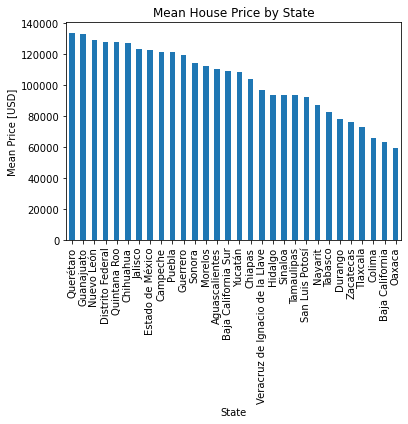

In [5]:
mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="Mean Price [USD]",
    title="Mean House Price by State"
)

**Task 1.4.4:** Create a new column in `df` called `"price_per_m2"`. This should be the price for each house divided by it's size. 


In [6]:
df["price_per_m2"] = df["price_usd"]/df["area_m2"]
df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


**Task 1.4.5:** First, use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to create a Series where the index contains each state in the dataset and the values correspond to the mean house price per m<sup>2</sup> for that state. Then use the Series to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as `"State"` and the y-axis as `"Mean Price per M^2[USD]"`, and give the chart the title `"Mean House Price per M^2 by State"`. 


<AxesSubplot:title={'center':'Mean House Price by State'}, xlabel='State', ylabel='Mean Price [USD]'>

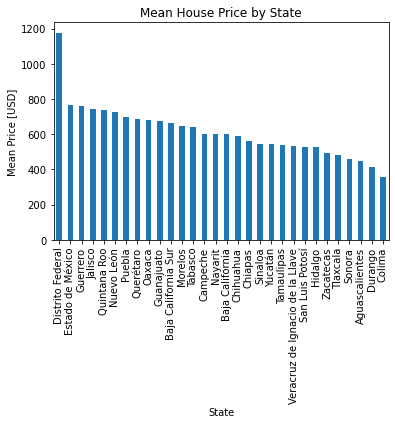

In [7]:
mean_house_price_per_m2 = df.groupby("state")["price_per_m2"].mean().sort_values(ascending=False).round(2)
mean_house_price_per_m2
mean_house_price_per_m2.plot(
    kind="bar",
    xlabel="State",
    ylabel="Mean Price [USD]",
    title="Mean House Price by State"
)

<AxesSubplot:title={'center':'Mean House Price by State'}, xlabel='State', ylabel='Mean Price [USD]'>

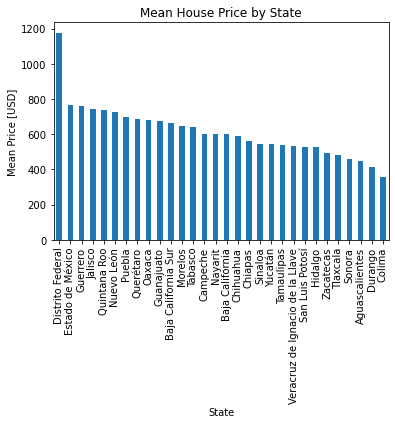

In [8]:
(
    df.groupby("state")["price_per_m2"].mean()
    .sort_values(ascending=False).round(2)
    .plot(
    kind="bar",
    xlabel="State",
    ylabel="Mean Price [USD]",
    title="Mean House Price by State"
         )
)


# Research Question 2

**Is there a relationship between home size and price?**

From our previous question, we know that the location of a home affects its price (especially if it's in Mexico City), but what about home size? Does the size of a house influence price?

A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables are correlated — in this case, if an increase in home size is associated with an increase in price.

**Task 1.4.6:** Create a scatter plot from `df` that represents price as a function of size. In other words, `"area_m2"` should be on the x-axis, and `"price_usd"` should be on the y-axis. Be sure to use expressive axis labels (`"Area [sq meters]"` and `"Price [USD]"`, respectively).


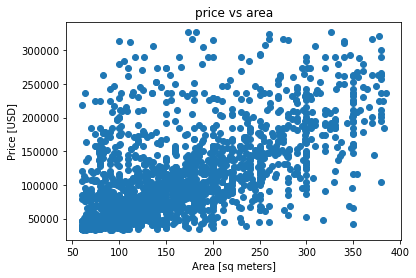

In [9]:
plt.scatter(x=df["area_m2"],y=df["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("price vs area");

**Task 1.4.7:** Using the [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html) method, calculate the Pearson correlation coefficient for `"area_m2"` and `"price_usd"`. 


In [10]:
p_correlation = df["area_m2"].corr(df["price_usd"])
p_correlation

0.5855182453232063

The correlation coefficient is over 0.5, so there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with `Morelos`.

**Task 1.4.8:** Create a new DataFrame named `df_morelos`. It should include all the houses from `df` that are in the state of Morelos.


In [11]:
df_morelos = df[df["state"]=="Morelos"]

In [12]:
df_morelos.shape

(160, 7)

**Task 1.4.9:** Using `df_morelos`, create a scatter plot that shows price vs area. Make sure to use the same axis labels as your last scatter plot. The title should be `"Morelos: Price vs. Area"`.
​

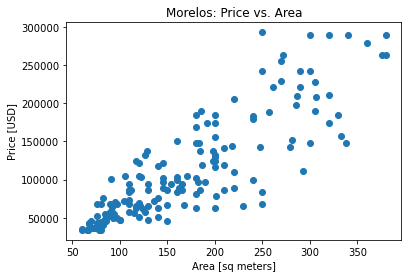

In [13]:
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Morelos: Price vs. Area");    

**Task 1.4.10:** Using the [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html) method, calculate the Pearson correlation coefficient for `"area_m2"` and `"price_usd"` in `df_morelos`. 


In [14]:
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])
print(p_correlation)

0.8498077608713708


**Task 1.4.11:** First, create a new DataFrame called `df_mexico_city` that includes all the observations from `df` that are part of the *Distrito Federal*. Next, create a scatter plot that shows price vs area. Don't forget to label the x- and y-axis and use the title `"Mexico City: Price vs. Area"`. Finally, calculate the  correlation coefficient for `"area_m2"` and `"price_usd"` in `df_mexico_city`.


0.41070392130717864


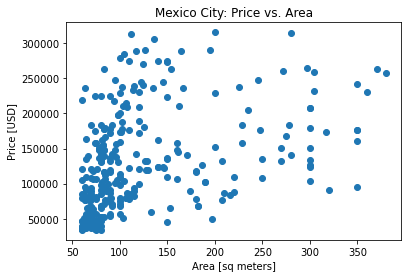

In [15]:
# Subset `df` to include only observations from `"Distrito Federal"`
df_mexico_city = df[df["state"]=="Distrito Federal"]

# Create a scatter plot price vs area
plt.scatter(x=df_mexico_city["area_m2"], y=df_mexico_city["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Mexico City: Price vs. Area");   

p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])
print(p_correlation)